# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [10]:
options(warn=-1)


sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c


simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c){
  age = runif(sample_size, age_lo, age_hi) # age of child in months
  x = beta_xa*age + beta_x0 + rnorm(sample_size, sd = sd_x) # word experience
  c = beta_ca*age + beta_cx*x + beta_c0 + rnorm(sample_size, sd = sd_c) # reading comp
  return(data.frame(age=age, read.exp = x, read.comp = c))
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,read.exp,read.comp
,<dbl>,<dbl>,<dbl>
1,192.73600,52.9134,467.8915
2,119.74176,137.5852,480.0522
3,142.14513,101.3678,400.7756
4,86.25459,97.6966,378.1044
5,145.04896,121.8680,532.7186
6,123.70392,27.7354,208.5162


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

`geom_smooth()` using formula 'y ~ x'



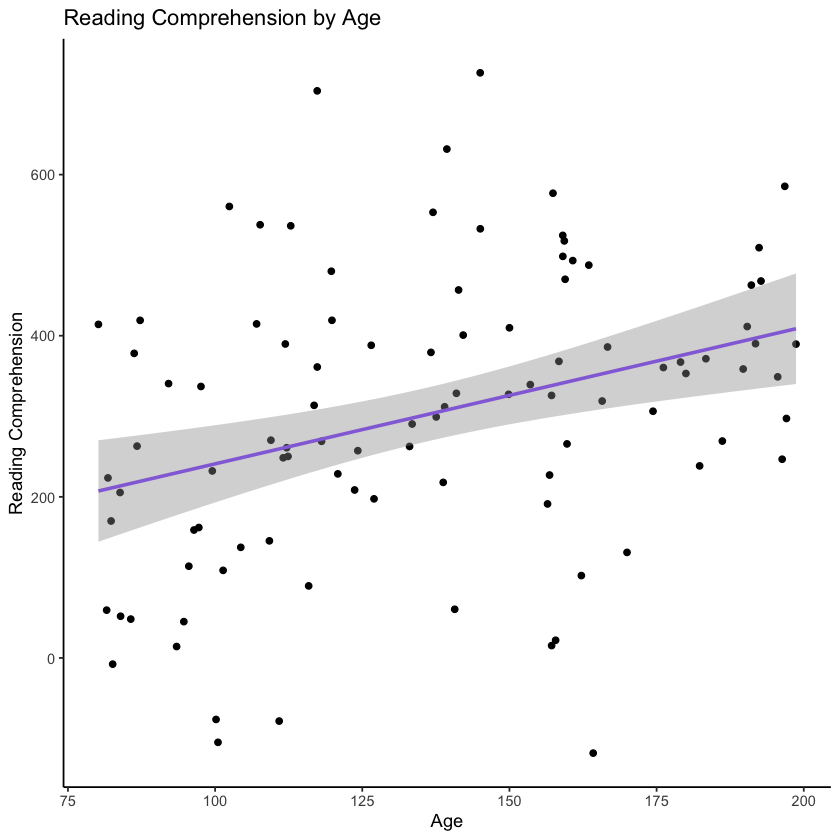

In [11]:
plot1<- ggplot(dat, aes(x=age, y=read.comp)) + 
  geom_point() + 
  geom_smooth(method = "lm", colour = "mediumpurple") +
  labs(x="Age", y="Reading Comprehension", title = "Reading Comprehension by Age") +
  theme_classic()

plot1



b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula 'y ~ x'



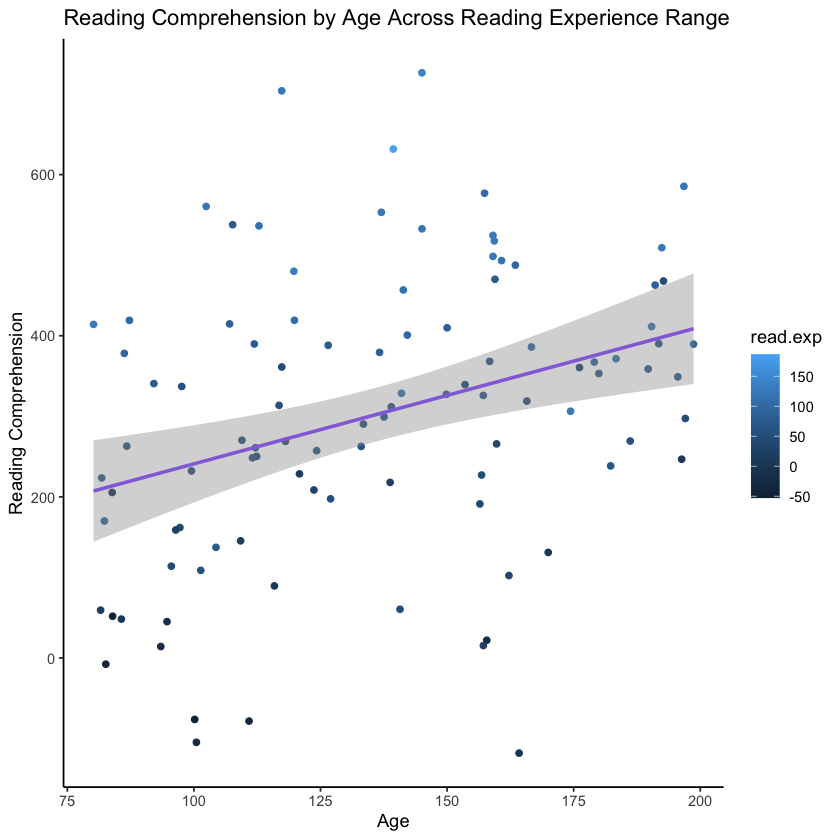

In [15]:
plot2 <- ggplot(dat, aes(age, read.comp, colour = read.exp)) +
  geom_point() + geom_smooth(method = "lm", colour = "mediumpurple") +
  labs(x="Age", y="Reading Comprehension", 
       title = "Reading Comprehension by Age Across Reading Experience Range ") +
  theme_classic()

plot2

---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [16]:
library(mediation)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [17]:
## First run a linear regression of IV (age) on mediator (reading experience)
M_fit <- lm(read.exp ~ age, data = dat)
summary(M_fit)


## M_fit summary outupt: 

## Call:
## lm(formula = read.exp ~ age, data = dat)

## Residuals:
##      Min       1Q   Median       3Q      Max 
## -102.076  -31.070   -0.639   31.278  123.489 

## Coefficients:
##             Estimate Std. Error t value Pr(>|t|)   
## (Intercept)  14.2514    18.3974   0.775  0.44041   
## age           0.3492     0.1310   2.665  0.00901 **
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Residual standard error: 45.74 on 98 degrees of freedom
## Multiple R-squared:  0.06755,	Adjusted R-squared:  0.05804 
## F-statistic:   7.1 on 1 and 98 DF,  p-value: 0.009015


## Next run full linear model predicting y (reading comp)
## from M (reading experience) and X1 (age)
Y_fit <- lm(read.comp ~ read.exp + age, data = dat)
summary(Y_fit)


## Y_fit summary output: 
## Call:
## lm(formula = read.comp ~ read.exp + age, data = dat)

## Residuals:
##     Min      1Q  Median      3Q     Max 
## -240.85  -48.92   -2.09   60.25  221.60 

## Coefficients:
##             Estimate Std. Error t value Pr(>|t|)    
## (Intercept)  26.7283    36.6347   0.730   0.4674    
## read.exp      3.1036     0.2005  15.476   <2e-16 ***
## age           0.6162     0.2694   2.287   0.0243 *  
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Residual standard error: 90.8 on 97 degrees of freedom
## Multiple R-squared:  0.7442,	Adjusted R-squared:  0.7389 
## F-statistic: 141.1 on 2 and 97 DF,  p-value: < 2.2e-16



fitMed <- mediate(M_fit, Y_fit, treat = "age", mediator = "read.exp")
summary(fitMed)


## fitMed summary output: 

## Causal Mediation Analysis 

## Quasi-Bayesian Confidence Intervals

##                Estimate 95% CI Lower 95% CI Upper p-value    
## ACME             1.0790       0.3200         1.89   0.006 ** 
## ADE              0.6062       0.0727         1.15   0.026 *  
## Total Effect     1.6852       0.7929         2.59  <2e-16 ***
## Prop. Mediated   0.6442       0.2987         0.94   0.006 ** 
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Sample Size Used: 100 

## Simulations: 1000 


Call:
lm(formula = read.exp ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.076  -31.070   -0.639   31.278  123.489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  14.2514    18.3974   0.775  0.44041   
age           0.3492     0.1310   2.665  0.00901 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.74 on 98 degrees of freedom
Multiple R-squared:  0.06755,	Adjusted R-squared:  0.05804 
F-statistic:   7.1 on 1 and 98 DF,  p-value: 0.009015



Call:
lm(formula = read.comp ~ read.exp + age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-240.85  -48.92   -2.09   60.25  221.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.7283    36.6347   0.730   0.4674    
read.exp      3.1036     0.2005  15.476   <2e-16 ***
age           0.6162     0.2694   2.287   0.0243 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 90.8 on 97 degrees of freedom
Multiple R-squared:  0.7442,	Adjusted R-squared:  0.7389 
F-statistic: 141.1 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME             1.0790       0.3200         1.89   0.006 ** 
ADE              0.6062       0.0727         1.15   0.026 *  
Total Effect     1.6852       0.7929         2.59  <2e-16 ***
Prop. Mediated   0.6442       0.2987         0.94   0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> In the first model, age significantly predicts reading experience such that for every 1 unit increase in age (1 month), reading experience score increases by 0.349 units. Then in the second model, predicting the DV from age and reading experience, both age and reading experience significantly predict reading comprehension score however reading experience contributes robustly to the model prediction (t=15.48, p<0.001***, 1 unit increase in reading experience results in 3.10 unit increase in reading comprehension) whereas the main effect of age is relatively weaker (t=2.29, p=0.024, 1 unit increase in age results in 0.616 unit increase in reading comprehension). 

> Regarding the mediation model, ACME represents mediating or indirect effect, exploring if Y would change significantly if you hold age constant and vary reading experience. ADE explores if Y would change significantly if you hold reading experience constant and vary age. Given that ACME is significant, this suggests that reading experience has a modifying effect on age; however, the relationship between age and reading comprehension is not entirely moderated by reading experience (given the ADE and linear model findings). 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [18]:
run_analysis <- function(data) {
  runif(sample_size, age_lo, age_hi)
  M_fit <- lm(read.exp ~ age, data = data)
  Y_fit <- lm(read.comp ~ read.exp + age, data = data)
  fitMed <- mediate(M_fit, Y_fit, treat = "age", mediator = "read.exp")
  d0 <- fitMed$d0 ## ACME estimate
  d0.p <- fitMed$d0.p ## ACME p-value
  z0 <- fitMed$z0 ## ADE estimate
  z0.p <- fitMed$z0.p # ADE p-value
  return(c(d0, d0.p, z0, z0.p))
}

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [19]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
                            beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
  # Initialize simouts matrix for storing each output from run_analysis()
  simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
  
  # Start simulating
  for (i in 1:num_simulations) {
    data.sim <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, 
                              sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    simouts[i,] <- run_analysis(data.sim)
  }
  
  # Calculate coverage for both ACME and ADE estimates using p-values in simouts
  ACME_cov = mean(simouts[,2]<=alpha)
    ADE_cov = mean(simouts[,4]<=alpha)
    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [21]:
repeat_analysis(num_simulations = 10, alpha = 0.01, sample_size, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)


$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.7

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [22]:
var_sample_size <- c(50, 75, 100, 125, 150)
num_sample_size <- length(var_sample_size)
coverage_loop <- matrix(NA, ncol = 3, nrow = 5)
colnames(coverage_loop) <- c("num_sim", "ACME_cov", "ADE_cov")


for (i in 1:num_sample_size) {
  sample_size = var_sample_size[i]
  coverage_loop[i,"num_sim"] <- sample_size
  
  cov_values <- repeat_analysis(num_simulations = 10, alpha = 0.01, sample_size = sample_size, 
                  age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
  
  coverage_loop[i, "ACME_cov"] <- cov_values$ACME_cov
  coverage_loop[i, "ADE_cov"] <- cov_values$ADE_cov
    
}


Print your results. 

In [23]:
print(coverage_loop)


     num_sim ACME_cov ADE_cov
[1,]      50      0.4     0.4
[2,]      75      0.7     0.4
[3,]     100      0.8     0.8
[4,]     125      0.7     0.8
[5,]     150      0.9     1.0


If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> Based on the results above, it's clear that as sample size increases so does coverage for ACME and ADE. For example with sample size of 100, there is an 80% probability that we correctly reject the ACME null hypothesis (that there is no difference in reading experience if age is held constant) at p < 0.01, and an 80% probability that we correctly reject the ADE null hypothesis (that there is no difference in age if reading experience is held constant) at p < 0.01.

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> The moderator, reading experience, was generated by adding: a beta coefficient representing the amount by which experience changes for increase of one month in age, an intercept coefficient (amount of experience when age = 0), and normally distributed numbers influenced by standard deviation of a gaussian noise term. This means that the moderator (reading experience) specifically scales with age by 0.5 units NO MATTER WHAT. I believe that this data structure therefore inherently places an emphasis on the mediating effect and makes it conditional to the direct effect of interest. 

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Monique Tardif, dateh wrangler